# Loss curves
## Comparison of different trainings via train & val loss

In [1]:
# plot loss curves directly after training

import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.cms.style.ROOT)

In [2]:
dirz = {
    'nominal': f'/net/data_cms/institut_3a/hschoenen/models/nominal/',
    'nominal_2': f'/net/data_cms/institut_3a/hschoenen/models/nominal_2/',
    'nominal_3': f'/net/data_cms/institut_3a/hschoenen/models/nominal_3/',
    'nominal_seed1': f'/net/data_cms/institut_3a/hschoenen/models/nominal_seed1/',
    'nominal_seed2': f'/net/data_cms/institut_3a/hschoenen/models/nominal_seed2/',
    #'fgsm-0_01': f'/net/scratch_cms3a/hschoenen/deepjet/results/fgsm-0_01/',
    'fgsm-0_025': f'/net/scratch_cms3a/hschoenen/deepjet/results/fgsm-0_025/',
    'fgsm-0_05': f'/net/scratch_cms3a/hschoenen/deepjet/results/fgsm-0_05/',
    'fgsm-0_075': f'/net/scratch_cms3a/hschoenen/deepjet/results/fgsm-0_075/',
    'fgsm-0_1': f'/net/scratch_cms3a/hschoenen/deepjet/results/fgsm-0_1/',
    'fgsm-0_125': f'/net/scratch_cms3a/hschoenen/deepjet/results/fgsm-0_125/',
    'fgsm-0_15': f'/net/scratch_cms3a/hschoenen/deepjet/results/fgsm-0_15/',
    'fgsm-0_175': f'/net/scratch_cms3a/hschoenen/deepjet/results/fgsm-0_175/',
    'fgsm-0_2': f'/net/scratch_cms3a/hschoenen/deepjet/results/fgsm-0_2/',
    'fgsm-0_225': f'/net/scratch_cms3a/hschoenen/deepjet/results/fgsm-0_225/',
    'fgsm-0_25': f'/net/scratch_cms3a/hschoenen/deepjet/results/fgsm-0_25/',
}
saveDir = '/home/home1/institut_3a/hschoenen/plots'

In [3]:
colors = {
    'nominal': 'black',
    'nominal_2': 'red',
    'nominal_3': 'orange',
    'nominal_seed1': 'green',
    'nominal_seed2': 'blue',
    'fgsm-0_025' : 'darkviolet',
    'fgsm-0_05' : 'purple',
    'fgsm-0_075' : 'darkblue',
    'fgsm-0_1' : 'royalblue',
    'fgsm-0_125' : 'green',
    'fgsm-0_15' : 'lawngreen',
    'fgsm-0_175' : 'gold',
    'fgsm-0_2' : 'darkorange',
    'fgsm-0_225' : 'red',
    'fgsm-0_25' : 'darkred',
    }
training_linestyle='--'

leg_text = {
    'nominal': 'nominal (seed=0)',
    'nominal_2': 'nominal (seed=0)',
    'nominal_3': 'nominal (seed=0)',
    'nominal_seed1': 'nominal (seed=1)',
    'nominal_seed2': 'nominal (seed=2)',
    #'fgsm-0_01' : r'fgsm, ($\epsilon=0.01$, bsize=4000)',
    'fgsm-0_025' : r'fgsm $\epsilon=0.025$',
    'fgsm-0_05' : r'fgsm $\epsilon=0.05$',
    'fgsm-0_075' : r'fgsm $\epsilon=0.075$',
    'fgsm-0_1' : r'fgsm $\epsilon=0.1$',
    'fgsm-0_125' : r'fgsm $\epsilon=0.125$',
    'fgsm-0_15' : r'fgsm $\epsilon=0.15$',
    'fgsm-0_175' : r'fgsm $\epsilon=0.175$',
    'fgsm-0_2' : r'fgsm $\epsilon=0.2$',
    'fgsm-0_225' : r'fgsm $\epsilon=0.225$',
    'fgsm-0_25' : r'fgsm $\epsilon=0.25$',
}

[0.96542273 0.95755404 0.95416006 0.95048915 0.95761533 0.95184053
 0.96712291 0.95703173 0.96454848 0.95031055 0.94813712 0.949085
 0.9490527  0.94823773 0.94540001 0.94625637 0.94657281 0.94438298
 0.94591382 0.94467004 0.94768582 0.94404686 0.94717858 0.94528081
 0.94426235 0.94787514 0.9499913  0.94698259 0.94273548 0.94359
 0.95140837 0.94871424 0.946351   0.94327776 0.94424257 0.94524939
 0.9447993  0.94237079 0.94641637]
[0.96396608 0.95758421 0.95433642 0.95063329 0.95646204 0.95081627
 0.9578266  0.95439841 0.95858754 0.94847528 0.94871013 0.94587507
 0.95351925 0.94797773 0.94629991 0.94507441 0.94558083 0.94352206
 0.94723821 0.94400705 0.95141343 0.95025702 0.954033   0.94459604
 0.95372238 0.95366516 0.95664023 0.95538096 0.94171828 0.94398069
 0.95663852 0.95883468 0.94632517 0.94932015 0.9535538  0.95334824
 0.95019544 0.9396365  0.95074045]
[0.96692467 0.95888066 0.95259413 0.9485706  0.95454585 0.94950028
 0.9738717  0.95464884 0.95689435 0.94707991 0.94722233 0.945727

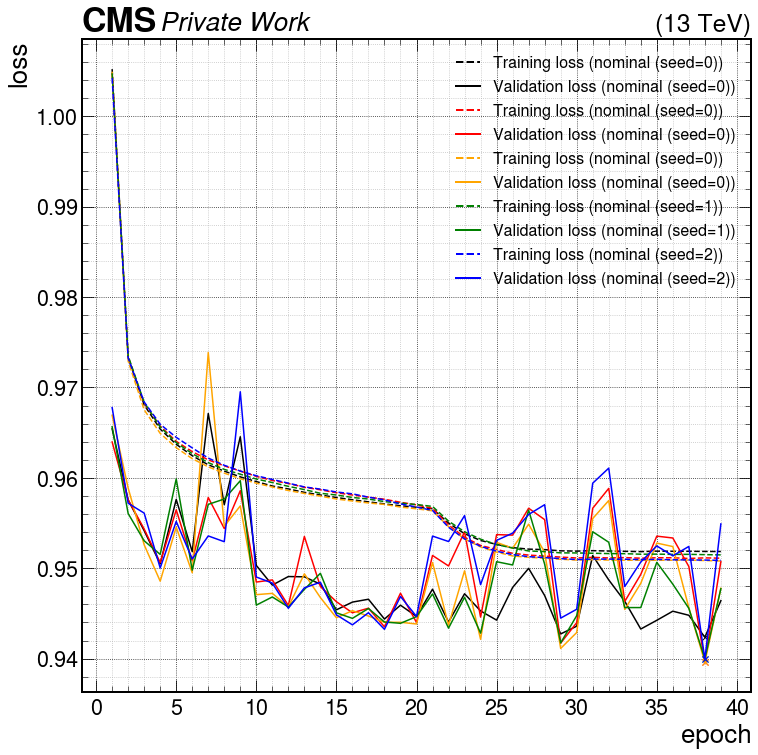

In [8]:
# specify models
model_names = ['nominal','nominal_2','nominal_3','nominal_seed1','nominal_seed2']#,'fgsm-0_025','fgsm-0_05','fgsm-0_075','fgsm-0_1','fgsm-0_125','fgsm-0_15','fgsm-0_175','fgsm-0_2','fgsm-0_225','fgsm-0_25']#'fgsm-0_01','fgsm-0_02','fgsm-0_01-new_epsilons',
# specify loss: 'training_validation' , 'training' , 'validation'
plot_mode = 'training_validation'
# specify: plot losses from batches in 1st epoch?
include_batch_losses = False
# specify: put a marker at the best validation loss
mark_best_loss = True

fig,ax = plt.subplots(figsize=[12,12])
plt.style.use(hep.cms.style.ROOT)
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')
title = ''
for model in model_names:
    title = title + model + '_'
    batch_training_losses = np.load(dirz[model]+'loss_values/batch_training_losses.npy', allow_pickle=True)
    batch_validation_losses = np.load(dirz[model]+'loss_values/batch_validation_losses.npy', allow_pickle=True)
    epoch_training_losses = np.load(dirz[model]+'loss_values/epoch_training_losses.npy', allow_pickle=True)
    epoch_validation_losses = np.load(dirz[model]+'loss_values/epoch_validation_losses.npy', allow_pickle=True)
    # losses from batches of first epoch
    indices = np.nonzero(batch_validation_losses)[0]
    n_batches = len(batch_validation_losses)
    batch_axis = np.arange(0,1+1/n_batches,1/n_batches)[indices]
    batch_training_losses = batch_training_losses[indices]
    batch_validation_losses = batch_validation_losses[indices]
    # losses from all epochs
    if mark_best_loss:
        best_epoch = epoch_validation_losses[-1]
        best_loss = epoch_validation_losses[int(best_epoch)-1]
    n_epochs = len(epoch_training_losses)-1
    epoch_axis = np.arange(1,n_epochs+1,1)
    epoch_training_losses = epoch_training_losses[:-1]
    epoch_validation_losses = epoch_validation_losses[:-1]

    if include_batch_losses:
        x = np.concatenate((batch_axis,epoch_axis))
        y_train = np.concatenate((batch_training_losses,epoch_training_losses))
        y_val = np.concatenate((batch_validation_losses,epoch_validation_losses))
    else:
        x = epoch_axis
        y_train = epoch_training_losses
        y_val = epoch_validation_losses
    if 'training' in plot_mode:
        ax.plot(x, y_train, color=colors[model], linestyle=training_linestyle, label=f'Training loss ({leg_text[model]})')
    if 'validation' in plot_mode:
        ax.plot(x, y_val, color=colors[model], linestyle='-', label=f'Validation loss ({leg_text[model]})')
        if mark_best_loss:
            plt.plot([best_epoch], [best_loss], color=colors[model], marker='x')
        print(y_val)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
if len(model_names)<6:
    leg = ax.legend(fontsize=16)
else:
    handles, labels = ax.get_legend_handles_labels()
    handles_sort = handles[0::2]+handles[1::2]
    labels_sort = labels[0::2]+labels[1::2]
    leg = ax.legend(handles_sort, labels_sort, fontsize=14, ncols=2, loc='upper right', handleheight=2.4, labelspacing=0.05, frameon=True,framealpha=1,facecolor='white')
for legobj in leg.legend_handles:
    legobj.set_linewidth(2.0)
leg.get_frame().set_linewidth(0.0)
leg._legend_box.align = 'right'
hep.cms.label(llabel='Private Work',rlabel='(13 TeV)')
plt.savefig('{}/loss_curves/loss_{}.pdf'.format(saveDir,plot_mode), bbox_inches='tight')
plt.savefig('loss.pdf', bbox_inches='tight')

In [5]:
model = 'fgsm-0_05'
a = np.load(dirz[model]+'loss_values/epoch_training_losses.npy')
print(len(a))
print(a)
print('minimum val loss {} at epoch {}'.format(min(a),np.argmin(a)+1))

79
[ 1.04370615  1.01563     1.01143729  1.00930981  1.00789634  1.00685587
  1.00702579  1.00598439  1.00498254  1.00436569  1.00389737  1.00345308
  1.00299817  1.00260346  1.00297512  1.00300631  1.00170163  1.00260525
  1.00164929  1.00191041  1.00169214  1.00130475  1.00101811  1.00062386
  1.0001619   0.99980591  0.99962491  0.99941965  0.99930034  0.9991396
  0.99904642  0.99886977  0.99876662  0.99862914  0.99853381  0.99841685
  0.99832922  0.99821401  0.99812106  0.99804624  0.9979769   0.99788109
  0.99717676  0.99655134  0.9960288   0.99558743  0.99526511  0.99501657
  0.99481905  0.99466225  0.99450527  0.99438652  0.99427978  0.99425076
  0.99421578  0.99415316  0.99410488  0.99408355  0.99408457  0.99406774
  0.99406962  0.99404256  0.99402594  0.99406544  0.99401731  0.99403276
  0.99400569  0.99402574  0.9940025   0.99405615  0.99402051  0.99404198
  0.99399635  0.99401169  0.9940485   0.99402973  0.99400544  0.99399876
 61.        ]
minimum val loss 0.9939963541483369

In [24]:
#best_loss = np.argmin(a)+1
#model = 'fgsm-0_05'
#b = np.load(dirz[model]+'loss_values/epoch_training_losses.npy')
#b=np.concatenate([b,[best_loss]])
#print(b)
#np.save(dirz[model]+'loss_values/epoch_training_losses.npy',b)

[ 1.04314882  1.01631237  1.01200576  1.00962701  1.00823832  1.00710424
  1.00622915  1.00559479  1.00501689  1.00446541  1.00392466  1.00330845
  1.00289555  1.002385    1.00192462  1.00148437  1.00114173  1.00089915
  1.00061656  1.00044699  1.0002725   1.0013201   1.00099129  1.0004245
  1.0000876   0.99979927  0.99966479  0.99942399  0.9992722   0.99917035
  0.99901348  0.99890436  0.99884005  0.99868906  0.99863075  0.99853458
  0.99841691  0.99836107  0.99934605  0.9995305   0.99899238  0.99877381
  0.99784394  0.99709347  0.99649149  0.9960366   0.99570821  0.99544747
  0.9952102   0.99504808  0.99492462  0.99473151  0.99475778  0.99464318
  0.99459961  0.99458409  0.99451209  0.99446722  0.99443235  0.99444251
  0.99442002  0.99441667  0.99439987  0.9944382   0.99441579  0.99441116
  0.99447339  0.99443599  0.99442068  0.99441827  0.99443478  0.99436392
  0.99440753  0.99464152  0.99470142  0.99470857  0.99468972  0.99465217
 61.        ]


In [16]:
labels[0::2]+labels[1::2]
labels[0::2]+labels[1::2]

['Training loss (nominal)',
 'Training loss (fgsm $\\epsilon=0.025$)',
 'Training loss (fgsm $\\epsilon=0.05$)',
 'Training loss (fgsm $\\epsilon=0.075$)',
 'Training loss (fgsm $\\epsilon=0.1$)',
 'Training loss (fgsm $\\epsilon=0.125$)',
 'Training loss (fgsm $\\epsilon=0.15$)',
 'Validation loss (nominal)',
 'Validation loss (fgsm $\\epsilon=0.025$)',
 'Validation loss (fgsm $\\epsilon=0.05$)',
 'Validation loss (fgsm $\\epsilon=0.075$)',
 'Validation loss (fgsm $\\epsilon=0.1$)',
 'Validation loss (fgsm $\\epsilon=0.125$)',
 'Validation loss (fgsm $\\epsilon=0.15$)']

In [ ]:
# specify models
model_names = ['nominal','fgsm-0_025','fgsm-0_05','fgsm-0_075','fgsm-0_1','fgsm-0_125','fgsm-0_15']#'fgsm-0_01','fgsm-0_02','fgsm-0_01-new_epsilons',
# specify loss: 'training_validation' , 'training' , 'validation'
plot_mode = 'training_validation'
# specify: plot losses from batches in 1st epoch?
include_batch_losses = False
# specify: put a marker at the best validation loss
mark_best_loss = True

plt.figure(1,figsize=[13,10])
plt.style.use(hep.cms.style.ROOT)
plt.grid(which='minor', alpha=0.85)
plt.grid(which='major', alpha=0.95, color='black')
title = ''
training_labels = ('Training loss')
validation_labels = ('
for model in model_names:
    title = title + model + '_'
    batch_training_losses = np.load(dirz[model]+'loss_values/batch_training_losses.npy', allow_pickle=True)
    batch_validation_losses = np.load(dirz[model]+'loss_values/batch_validation_losses.npy', allow_pickle=True)
    epoch_training_losses = np.load(dirz[model]+'loss_values/epoch_training_losses.npy', allow_pickle=True)
    epoch_validation_losses = np.load(dirz[model]+'loss_values/epoch_validation_losses.npy', allow_pickle=True)
    # losses from batches of first epoch
    indices = np.nonzero(batch_validation_losses)[0]
    n_batches = len(batch_validation_losses)
    batch_axis = np.arange(0,1+1/n_batches,1/n_batches)[indices]
    batch_training_losses = batch_training_losses[indices]
    batch_validation_losses = batch_validation_losses[indices]
    # losses from all epochs
    if mark_best_loss:
        best_epoch = epoch_validation_losses[-1]
        best_loss = epoch_validation_losses[int(best_epoch)-1]
    n_epochs = len(epoch_training_losses)-1
    epoch_axis = np.arange(1,n_epochs+1,1)
    epoch_training_losses = epoch_training_losses[:-1]
    epoch_validation_losses = epoch_validation_losses[:-1]

    if include_batch_losses:
        x = np.concatenate((batch_axis,epoch_axis))
        y_train = np.concatenate((batch_training_losses,epoch_training_losses))
        y_val = np.concatenate((batch_validation_losses,epoch_validation_losses))
    else:
        x = epoch_axis
        y_train = epoch_training_losses
        y_val = epoch_validation_losses
    if 'training' in plot_mode:
        plt.plot(x, y_train, color=colors[model][0], label=f'Training loss ({leg_text[model]})')
    if 'validation' in plot_mode:
        plt.plot(x, y_val, color=colors[model][1], label=f'Validation loss ({leg_text[model]})')
        if mark_best_loss:
            plt.plot([best_epoch], [best_loss], color=colors[model][1], marker='x')
plt.xlabel('epoch')
plt.ylabel('loss')
if len(model_names)<6:
    leg = plt.legend(fontsize=16)
else:
    leg = plt.legend(fontsize=12, ncols=2, handleheight=2.4, labelspacing=0.05)
for legobj in leg.legend_handles:
    legobj.set_linewidth(3.0)

plt.savefig(save_dir + title + plot_mode + '.pdf', bbox_inches='tight')
plt.savefig('loss.pdf', bbox_inches='tight')